<a href="https://colab.research.google.com/github/sarveshvengurlekar/IPMV_CP/blob/main/IPMV_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


Saving 617nWDaGkSL.jpg to 617nWDaGkSL (5).jpg


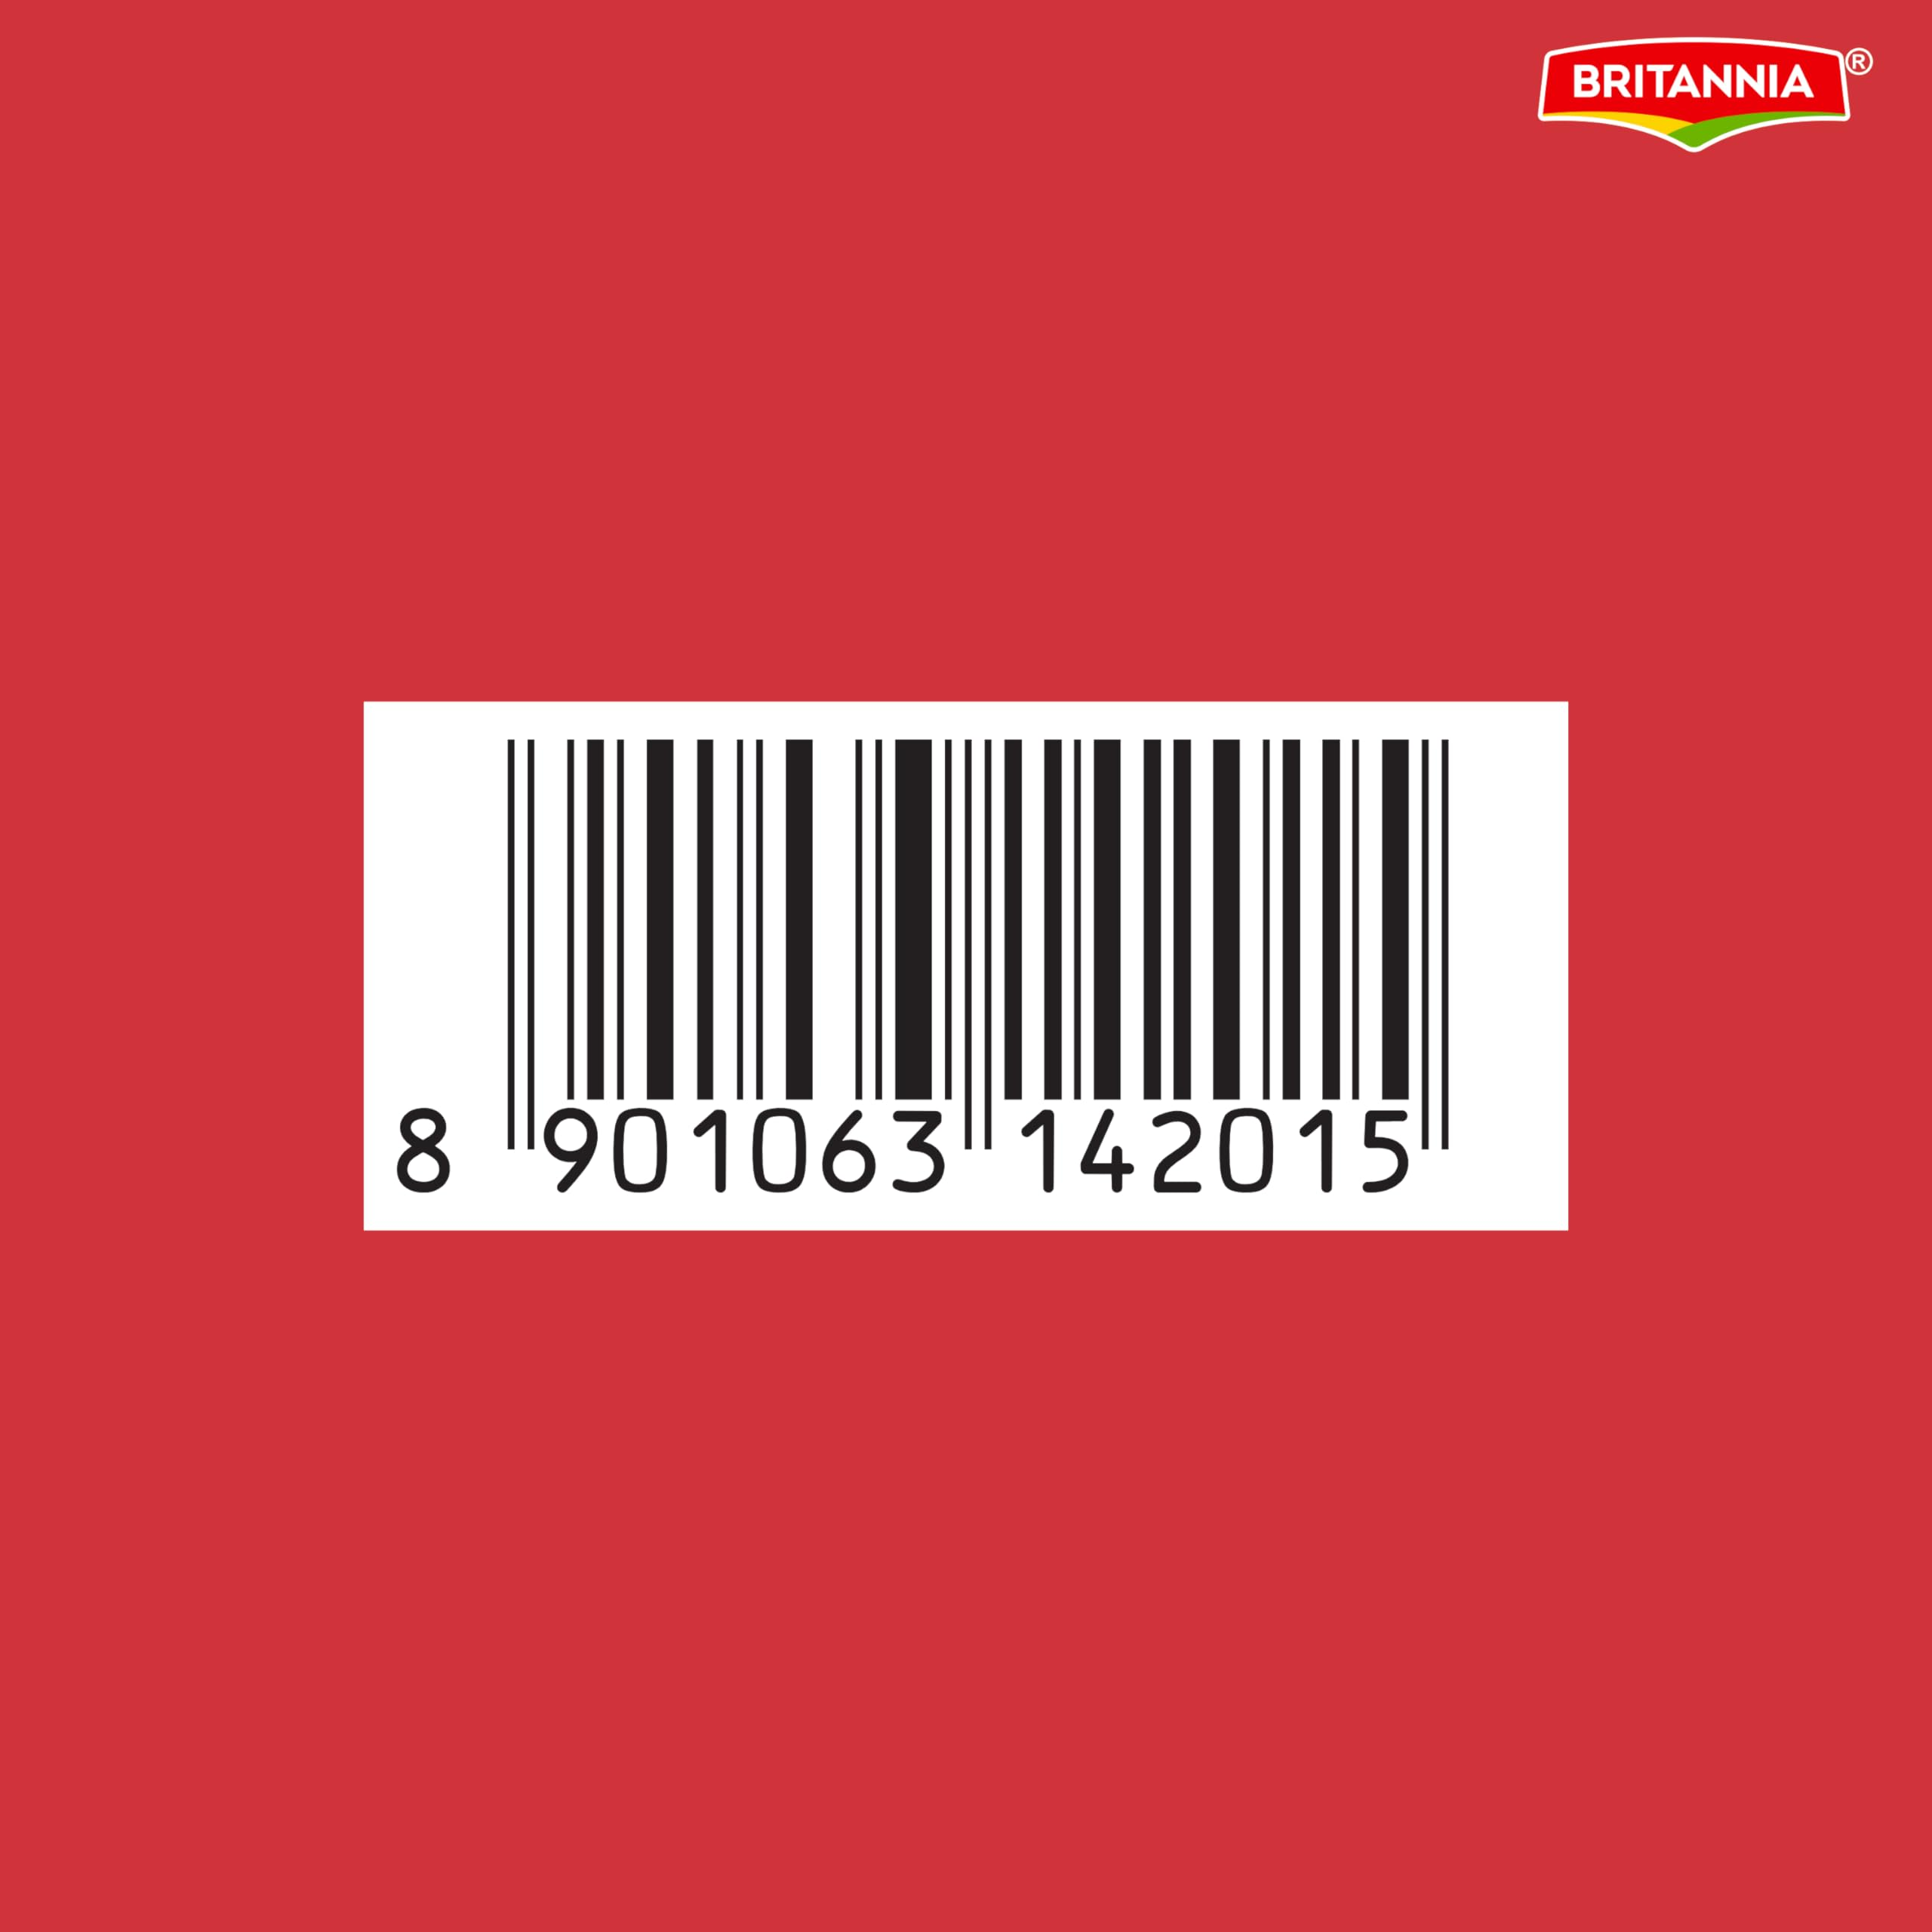

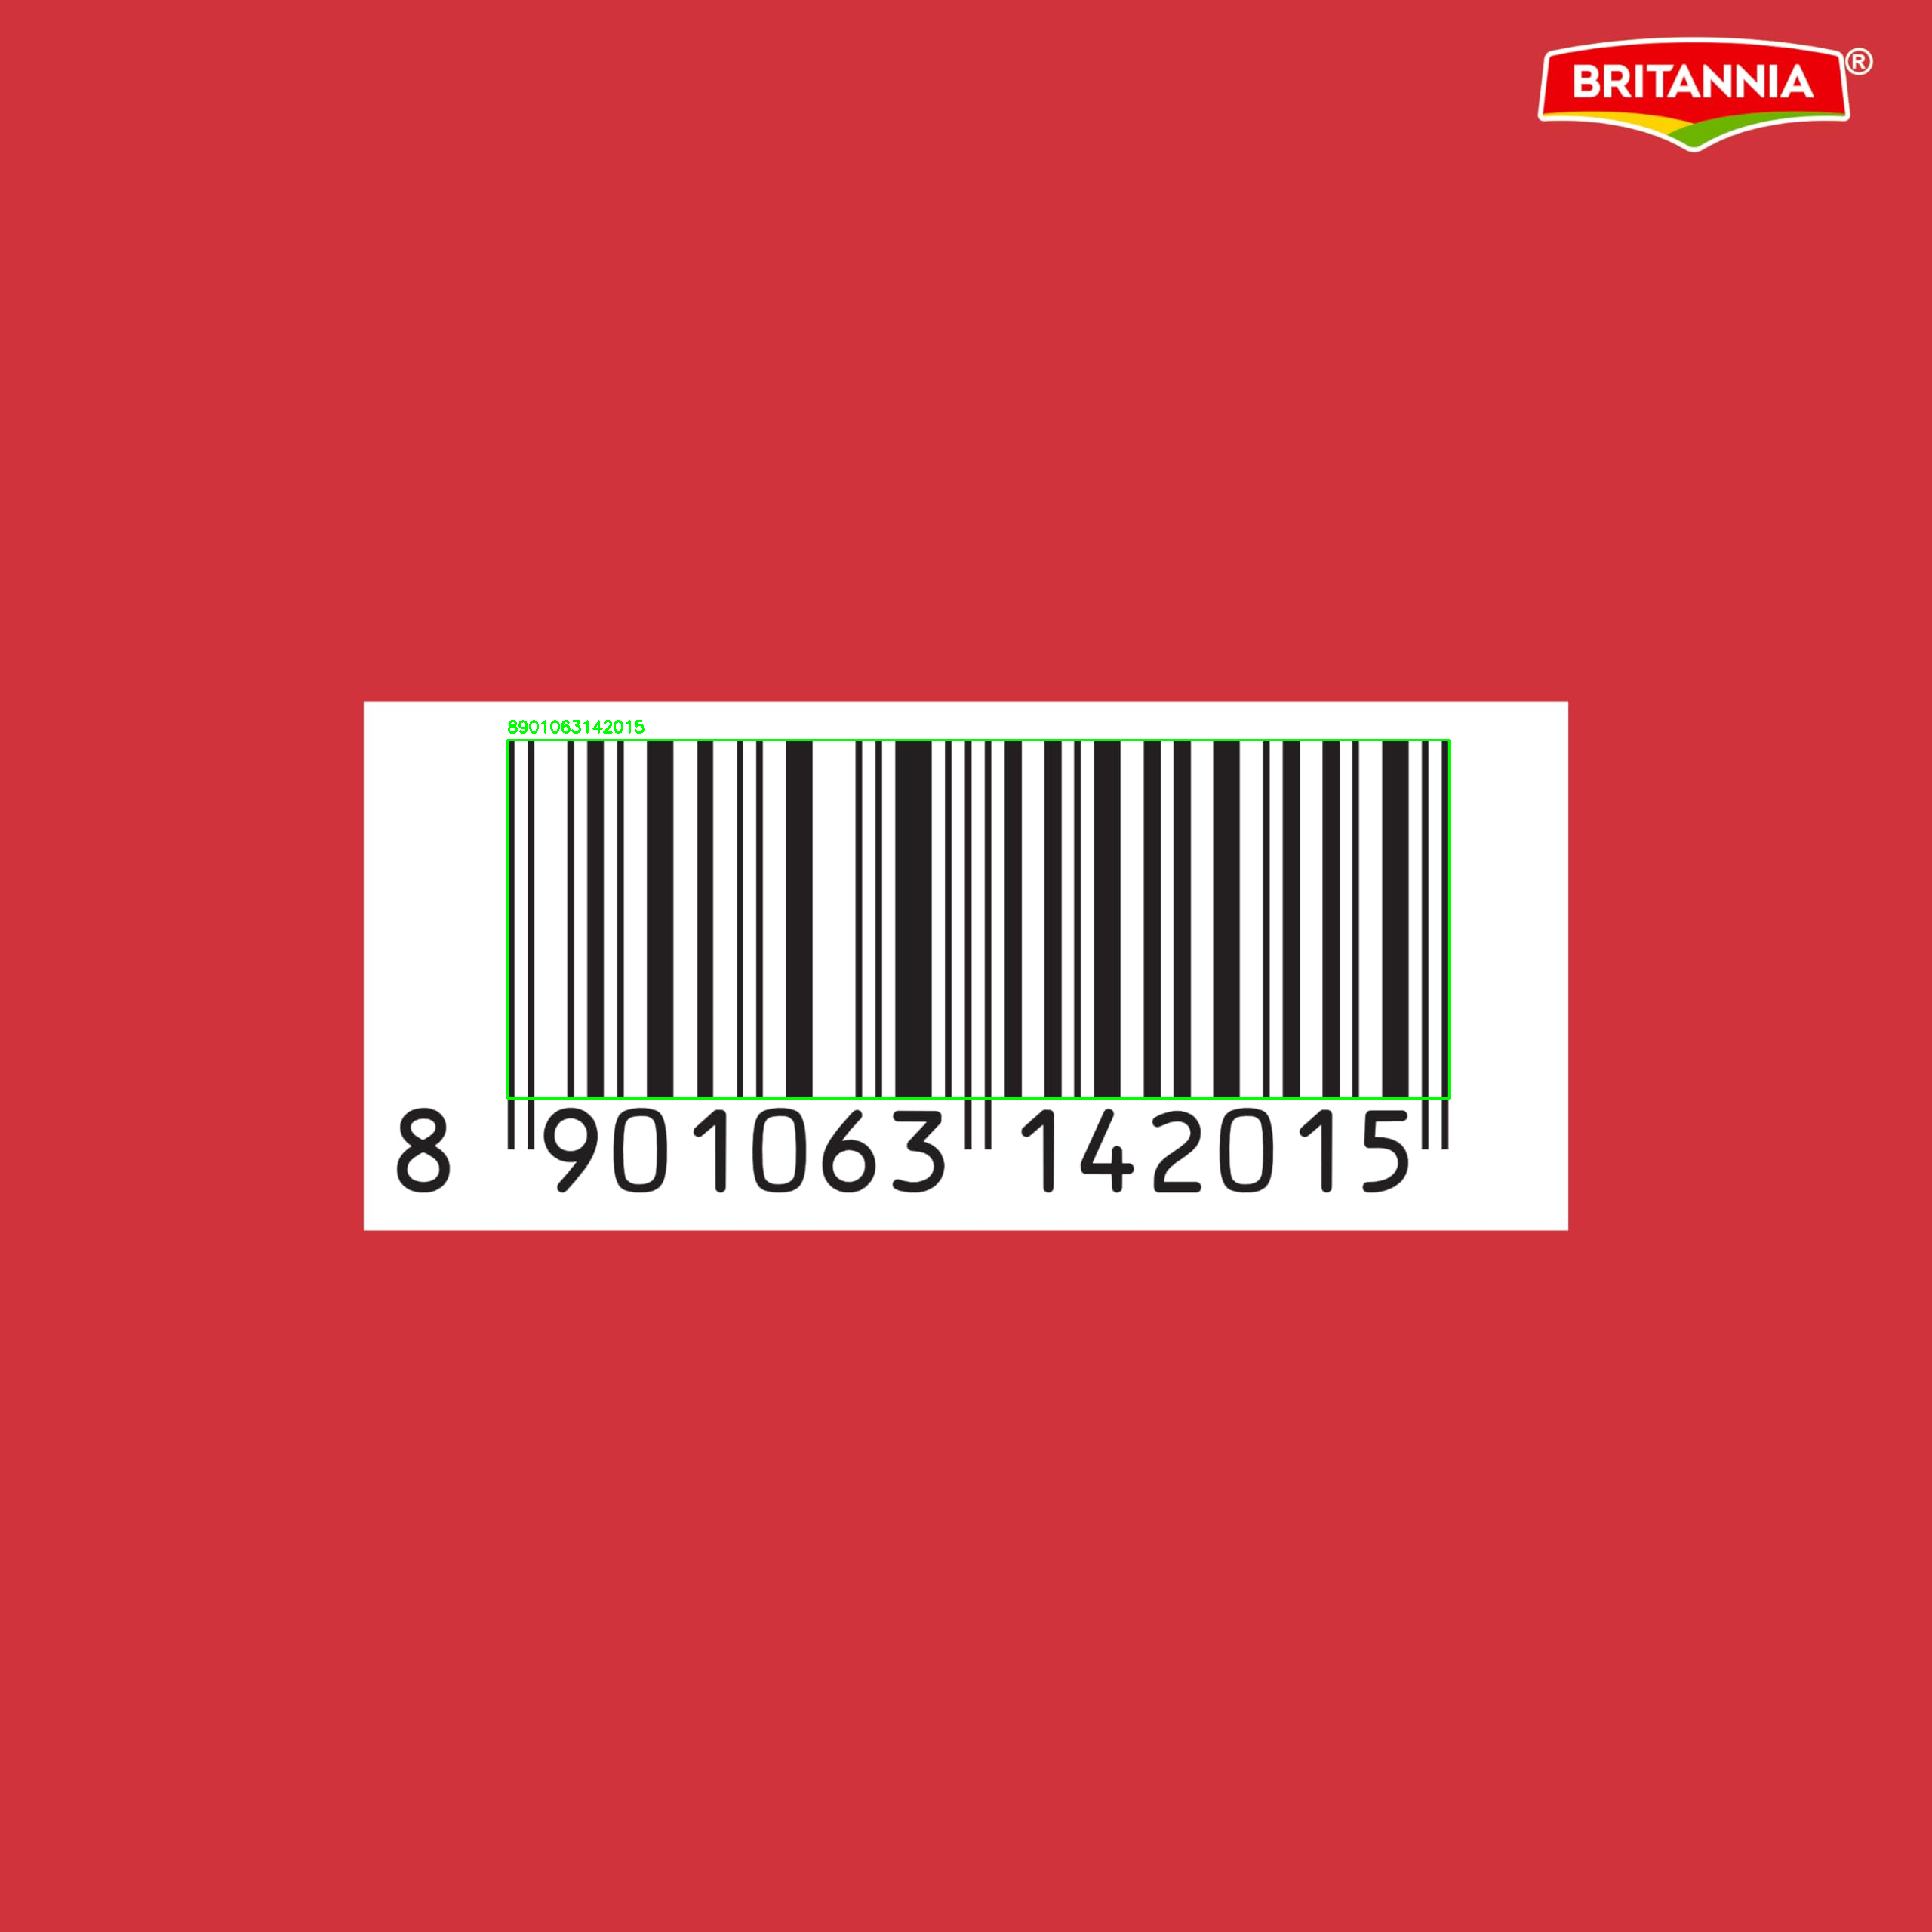


Decoded EAN Information:
EAN: 8901063142015
Country: India
Manufacturer Code: 1063
Product Code: 14201
Check Digit: 5
----------------------------------------


In [34]:
# Install dependencies
!apt-get install libzbar0 -y
!pip install pyzbar

import cv2
import numpy as np
from pyzbar.pyzbar import decode
from google.colab import files
from IPython.display import display, Image

def preprocess_image(image):
    """ Convert image to grayscale and apply adaptive thresholding to enhance barcode visibility. """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

def decode_ean(ean):
    """ Decodes EAN-8 or EAN-13 barcode and extracts details. """
    ean = str(ean)

    if len(ean) not in [8, 13]:
        return {"Error": "Invalid EAN. It should be 8 or 13 digits long."}

    country_codes = {
        '000': 'USA/Canada',
        '380': 'Bulgaria',
        '400': 'Germany',
        '460': 'Russia',
        '500': 'UK',
        '890': 'India',
    }

    country_code = ean[:3] if len(ean) == 13 else ean[:2]
    manufacturer_code = ean[3:7] if len(ean) == 13 else ean[2:5]
    product_code = ean[7:-1] if len(ean) == 13 else ean[5:-1]
    check_digit = ean[-1]

    country = country_codes.get(country_code, "Unknown Country")

    return {
        "EAN": ean,
        "Country": country,
        "Manufacturer Code": manufacturer_code,
        "Product Code": product_code,
        "Check Digit": check_digit
    }

def scan_and_decode_barcode(image_path):
    """ Scans barcode from image and decodes its details if it's an EAN-8 or EAN-13. """
    image = cv2.imread(image_path)
    processed_image = preprocess_image(image)

    barcodes = decode(processed_image)

    if not barcodes:
        return "No barcode detected."

    results = []

    for barcode in barcodes:
        ean_code = barcode.data.decode("utf-8")
        barcode_type = barcode.type
        rect = barcode.rect  # Get barcode location

        # Draw bounding box around barcode
        cv2.rectangle(image, (rect.left, rect.top),
                      (rect.left + rect.width, rect.top + rect.height),
                      (0, 255, 0), 2)

        if barcode_type in ["EAN13", "EAN8"]:
            decoded_info = decode_ean(ean_code)
            results.append(decoded_info)

            # Annotate the image with barcode number
            cv2.putText(image, ean_code, (rect.left, rect.top - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imwrite("output.png", image)  # Save the processed image with annotations
    return results

# Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Display uploaded image
display(Image(image_path))

# Scan and decode barcode
barcode_results = scan_and_decode_barcode(image_path)
display(Image("output.png"))  # Show the image with barcode detection

print("\nDecoded EAN Information:")
for result in barcode_results:
    for key, value in result.items():
        print(f"{key}: {value}")
    print("-" * 40)
